In [1]:
import seaborn as sb
import pandas as pd
import statistics as sts

#importar dados
dataset = pd.read_csv("tempo.csv", sep = ";")
#visualizar
print(dataset.head())

print(dataset.shape)

  Aparencia  Temperatura  Umidade       Vento Jogar
0       sol           85     85.0       FALSO   nao
1       sol           80     90.0  VERDADEIRO   nao
2   nublado           83     86.0       FALSO   sim
3     chuva           70      NaN       FALSO   sim
4     chuva           68     80.0       FALSO   sim
(14, 5)


In [2]:
#análise e tratamento da coluna 'Aparência' - dados fora do intervalo [sol, nublado, chuva]
print(dataset.groupby(['Aparencia']).size())

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64


In [3]:
#atribuindo 'chuva' ao conjuntos fora de intervalo (moda)
dataset.loc[(dataset['Aparencia'] != 'sol') & (dataset['Aparencia'] != 'nublado') & (dataset['Aparencia'] != 'chuva'), 'Aparencia'] = "chuva"
print(dataset.groupby(['Aparencia']).size())

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64


In [4]:
#análise e tratamento da coluna 'Temperatura' - itervalo [-130 ~ 130]°F
print(dataset.groupby(['Temperatura']).size())
print(dataset['Temperatura'].isnull().sum())

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64
0


Text(0.5, 1.0, 'Temperatura')

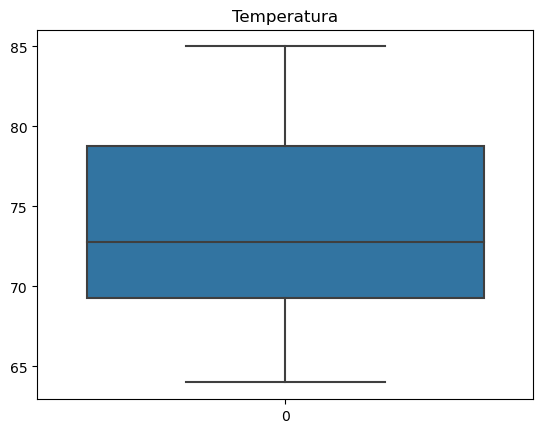

In [5]:
mediana = sts.median(dataset['Temperatura'])
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana
sb.boxplot(dataset['Temperatura']).set_title('Temperatura')

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64
1
Text(0.5, 1.0, 'Umidade')


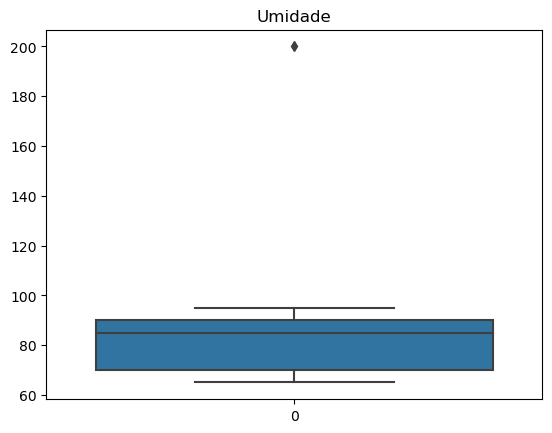

In [6]:
#análise e tratamento da coluna 'Umidade' - intervalo [0 ~ 100]e preenchendo os NANs
print(dataset['Umidade'].describe())
print(dataset['Umidade'].isnull().sum())
print(sb.boxplot(dataset['Umidade']).set_title('Umidade'))

NAs:  0
Text(0.5, 1.0, 'Umidade')


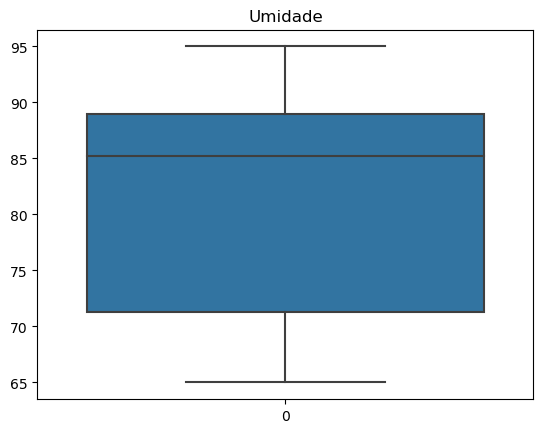

In [7]:
#correção dos números fora de intervalo
mediana = sts.median(dataset['Umidade'])
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = mediana
#correção dos NANs
dataset['Umidade'].fillna(mediana, inplace = True)

print("NAs: ", dataset['Umidade'].isnull().sum())
print(sb.boxplot(dataset['Umidade']).set_title('Umidade'))

count      14
unique      2
top       sim
freq        9
Name: Jogar, dtype: object
NAs:  0


<Axes: xlabel='Jogar', ylabel='count'>

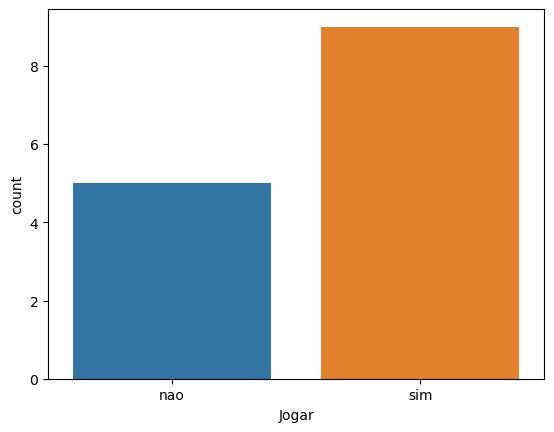

In [8]:
#análise e tratamento da coluna 'Jogar' - bool[sim/não]
print(dataset['Jogar'].describe())
print("NAs: ",dataset['Jogar'].isnull().sum())
sb.countplot(x='Jogar', data = dataset)

In [9]:
#análise e tratamento da coluna 'Vento'
print(dataset.groupby(dataset['Vento']).size())
print(dataset['Vento'].isnull().sum())

Vento
FALSO         7
VERDADEIRO    6
dtype: int64
1


In [10]:
dataset['Vento'].fillna('FALSO', inplace = True)
dataset['Vento'].isnull().sum()

0

In [11]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim


In [12]:
dataset.shape

(14, 5)